In [2]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta, date
import matplotlib.pyplot as plt
import seaborn as sns
################################################
from sklearn.ensemble import RandomForestClassifier

### Obtaining the data

In [3]:
data = pd.read_csv('https://raw.githubusercontent.com/PacktPublishing/Data-Science-for-Marketing-Analytics-Second-Edition/master/Chapter07/Exercise7.03/Churn_Modelling.csv')

In [4]:
data.head()

,CustomerId,CredRate,Geography,Gender,Age,Tenure,Balance,Prod Number,HasCrCard,ActMem,EstimatedSalary,Exited
0,15634602,619,France,Female,42.0,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41.0,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42.0,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39.0,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43.0,2,125510.82,1,1,1,79084.10,0


### Scrubbing the data

Imputing missing value


In [5]:
data.isnull().any()

CustomerId         False
CredRate           False
Geography          False
Gender              True
Age                 True
Tenure             False
Balance            False
Prod Number        False
HasCrCard          False
ActMem             False
EstimatedSalary     True
Exited             False
dtype: bool

It seems that the Gender, Age, and EstimatedSalary columns have
missing values.

In [6]:
data[["EstimatedSalary","Age"]].describe()

,EstimatedSalary,Age
count,9996.000000,9994.000000
mean,100074.744083,38.925255
std,57515.774555,10.489248
min,11.580000,18.000000
25%,50974.077500,32.000000
50%,100168.240000,37.000000
75%,149388.247500,44.000000
max,199992.480000,92.000000


In [7]:
data.describe()

,CustomerId,CredRate,Age,Tenure,Balance,Prod Number,HasCrCard,ActMem,EstimatedSalary,Exited
count,1.000000e+04,10000.000000,9994.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,9996.000000,10000.000000
mean,1.569094e+07,650.528800,38.925255,5.012800,76485.889288,1.530200,0.70550,0.515100,100074.744083,0.203700
std,7.193619e+04,96.653299,10.489248,2.892174,62397.405202,0.581654,0.45584,0.499797,57515.774555,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,50974.077500,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100168.240000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


From the descriptive statistics, we can observe that the HasCrCard column
has a minimum value of 0 and a maximum value of 1. It seems that this variable
is categorical. 

In [8]:
data['HasCrCard'].value_counts()

1    7055
0    2945
Name: HasCrCard, dtype: int64

In [9]:
data.isnull().sum()

CustomerId         0
CredRate           0
Geography          0
Gender             4
Age                6
Tenure             0
Balance            0
Prod Number        0
HasCrCard          0
ActMem             0
EstimatedSalary    4
Exited             0
dtype: int64

Check the data types of the missing columns:

In [10]:
data[["Gender","Age","EstimatedSalary"]].dtypes

Gender              object
Age                float64
EstimatedSalary    float64
dtype: object

In [11]:
mean_value=data['EstimatedSalary'].mean()
data['EstimatedSalary']=data['EstimatedSalary'].fillna(mean_value)

In [12]:
data['Gender'].value_counts()

Male      5453
Female    4543
Name: Gender, dtype: int64

In [13]:
data['Gender']=data['Gender'].fillna(data['Gender']\
                             .value_counts().idxmax())

For Age, use mode() to get the mode of the data, which is 37, and then
replace the missing values with the mode of the values in the column using the
following code:

In [14]:
data['Age'].mode()
mode_value=data['Age'].mode()
data['Age']=data['Age'].fillna(mode_value[0])

In [15]:
data.isnull().any()

CustomerId         False
CredRate           False
Geography          False
Gender             False
Age                False
Tenure             False
Balance            False
Prod Number        False
HasCrCard          False
ActMem             False
EstimatedSalary    False
Exited             False
dtype: bool

We have eliminated all the missing values

### Renaming Columns and Changing the Data Type

In [16]:
data = data.rename(columns={'CredRate': 'CreditScore',\
 'ActMem' : 'IsActiveMember',\
'Prod Number': 'NumOfProducts',\
                            'Exited':'Churn'}) 

In [17]:
column_churn = data['Churn']
data.drop(labels=['Churn'], axis=1,inplace = True)
data.insert(len(data.columns), 'Churn', column_churn.values)

In [18]:
data.columns

Index(['CustomerId', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure',
       'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Churn'],
      dtype='object')

Turning variables into categoical variables

In [19]:
data["Geography"] = data["Geography"].astype('category')
data["Gender"] = data["Gender"].astype('category')
data["HasCrCard"] = data["HasCrCard"].astype('category')
data["Churn"] = data["Churn"].astype('category')
data["IsActiveMember"] = data["IsActiveMember"]\
 .astype('category')

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   CustomerId       10000 non-null  int64   
 1   CreditScore      10000 non-null  int64   
 2   Geography        10000 non-null  category
 3   Gender           10000 non-null  category
 4   Age              10000 non-null  float64 
 5   Tenure           10000 non-null  int64   
 6   Balance          10000 non-null  float64 
 7   NumOfProducts    10000 non-null  int64   
 8   HasCrCard        10000 non-null  category
 9   IsActiveMember   10000 non-null  category
 10  EstimatedSalary  10000 non-null  float64 
 11  Churn            10000 non-null  category
dtypes: category(5), float64(3), int64(4)
memory usage: 596.4 KB


In this exercise, you successfully renamed a few columns to give more clarity about
their description. You converted the Geography, Gender, HasCrCard, Churn, and
IsActiveMember columns to the category type to convert them to categorical
features. Next, you shifted the Churn column to the extreme right to differentiate
between the target variable (Churn) and other columns.

### EDA

#### a) Statistical Overview  
This step typically involves inspecting the data using general descriptive statistics.
In a statistical overview, we summarize the data using the central tendency and
distribution of the data and inspect the target variable using mean, count, and other
functions studied in previous chapters.  
#### b) Correlation  
The correlation coefficient measures the linear relationship between two variables. It
is usually represented by r and varies from +1 to −1. We can interpret the correlation
value as given in the following table. For example, if there is a positive correlation
between the salary of a person and their monthly expenditure, we would infer that if
the salary increases, the person would tend to spend more, and vice versa  

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary
CustomerId,1.000000,0.005308,0.009696,-0.014883,-0.012419,0.016972,0.015272
CreditScore,0.005308,1.000000,-0.004179,0.000842,0.006268,0.012238,-0.001352
Age,0.009696,-0.004179,1.000000,-0.009996,0.028141,-0.030590,-0.007215
Tenure,-0.014883,0.000842,-0.009996,1.000000,-0.012254,0.013444,0.007407
Balance,-0.012419,0.006268,0.028141,-0.012254,1.000000,-0.304180,0.013129
NumOfProducts,0.016972,0.012238,-0.030590,0.013444,-0.304180,1.000000,0.014132
EstimatedSalary,0.015272,-0.001352,-0.007215,0.007407,0.013129,0.014132,1.000000


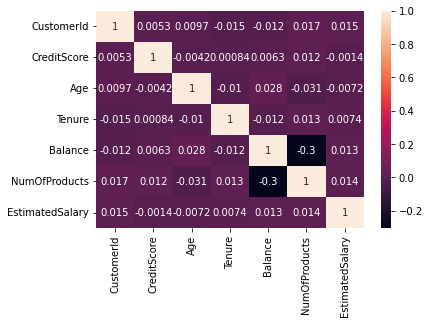

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

corr = data.corr()
sns.heatmap(corr, \
            xticklabels=corr.columns.values,\
 yticklabels=corr.columns.values,annot=True)
corr

In [22]:
data.describe()

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.924100,5.012800,76485.889288,1.530200,100074.744083
std,7.193619e+04,96.653299,10.486207,2.892174,62397.405202,0.581654,57504.269099
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,11.580000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,51002.110000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,100134.325000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,149382.097500
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,199992.480000


In [23]:
# Inspect the mean attributes of customers who churned compared to those who
# did not churn:
summary_churn = data.groupby('Churn')
summary_churn.mean()

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary
Churn,,,,,,,
0,1.569117e+07,651.853196,37.411277,5.033279,72745.296779,1.544267,99718.932023
1,1.569005e+07,645.351497,44.837997,4.932744,91108.539337,1.475209,101465.677531


In [24]:
summary_churn.median()

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary
Churn,,,,,,,
0,15691543.0,653.0,36.0,5.0,92072.68,2.0,99645.04
1,15688963.0,646.0,45.0,5.0,109349.29,1.0,102460.84


<AxesSubplot:>

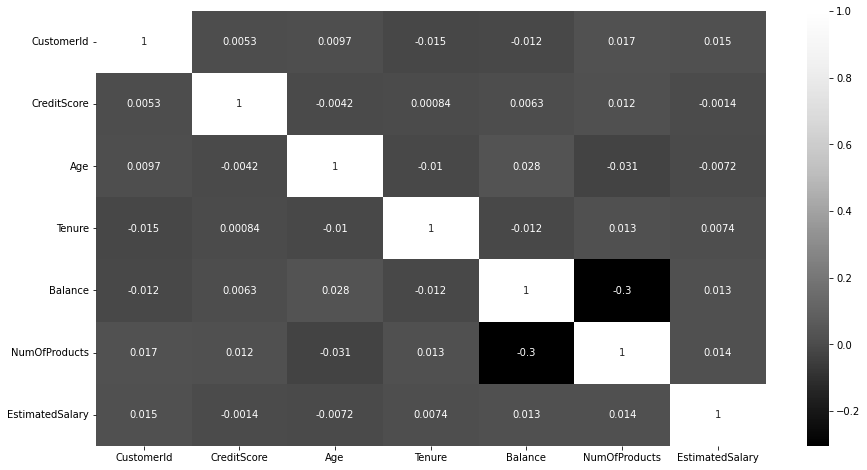

In [25]:
corr = data.corr()
plt.figure(figsize=(15,8))
sns.heatmap(corr, \
            xticklabels=corr.columns.values,\
 yticklabels=corr.columns.values,\
 annot=True,cmap='Greys_r') 

### Performing Exploratory Data Analysis (EDA)

c:\Users\kshit\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\kshit\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\kshit\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either 

Text(0, 0.5, 'No of Customers')

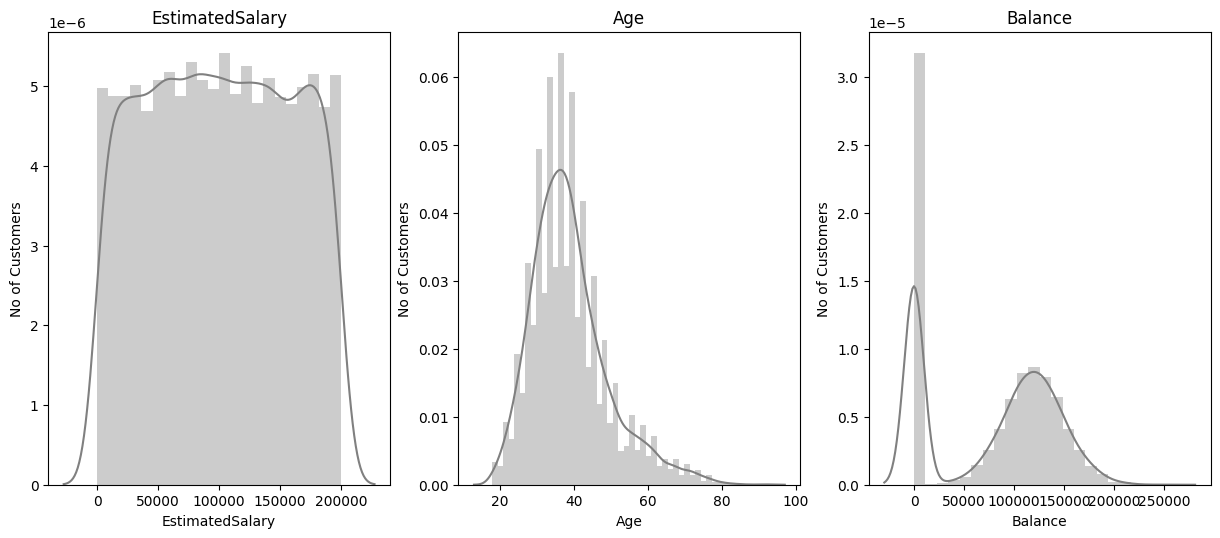

In [26]:
# plt.rcParams['savefig.dpi'] = 300
plt.rcParams["figure.dpi"] = 100
f, axes = plt.subplots(ncols=3, figsize=(15, 6))
sns.distplot(data.EstimatedSalary, kde=True, color="gray", ax=axes[0]).set_title('EstimatedSalary')
axes[0].set_ylabel('No of Customers')
sns.distplot(data.Age, kde=True, color="gray", ax=axes[1]).set_title('Age')
axes[1].set_ylabel('No of Customers')
sns.distplot(data.Balance, kde=True, color="gray", ax=axes[2]).set_title('Balance')
axes[2].set_ylabel('No of Customers')

Text(0.5, 1.0, 'Customer Churn Distribution by Gender')

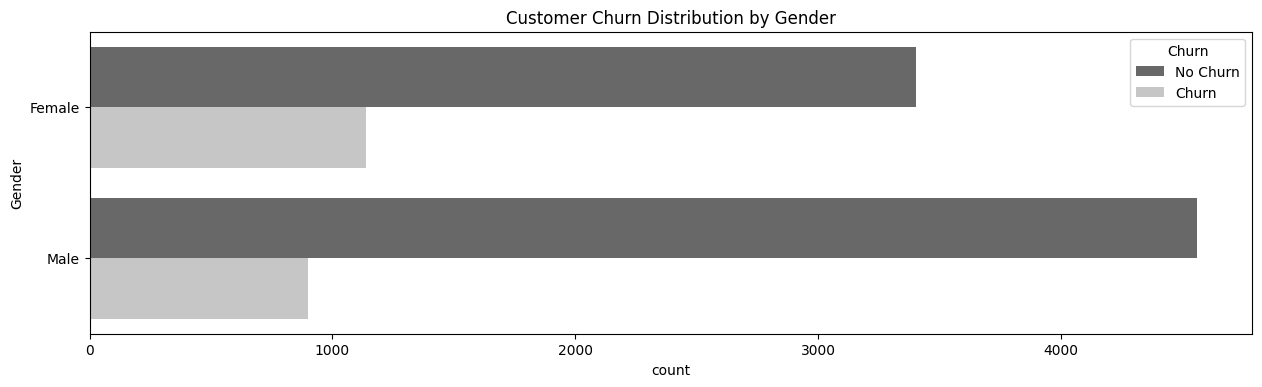

In [27]:
plt.figure(figsize=(15,4))
p=sns.countplot(y="Gender", hue='Churn', data=data,\
 palette="Greys_r")
legend = p.get_legend()
legend_txt = legend.texts
legend_txt[0].set_text("No Churn")
legend_txt[1].set_text("Churn")
p.set_title('Customer Churn Distribution by Gender')


Text(0.5, 1.0, 'Customer Geography Distribution')

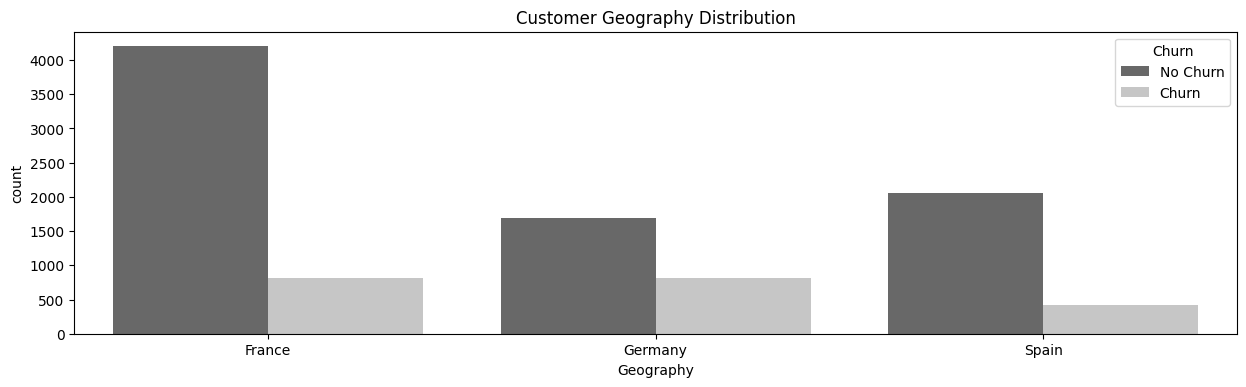

In [28]:
# Plot Geography versus Churn:
plt.figure(figsize=(15,4))
p=sns.countplot(x='Geography', hue='Churn', data=data, \
 palette="Greys_r")
legend = p.get_legend()
legend_txt = legend.texts
legend_txt[0].set_text("No Churn")
legend_txt[1].set_text("Churn")
p.set_title('Customer Geography Distribution')

Text(0.5, 1.0, 'Customer Distribution by Product')

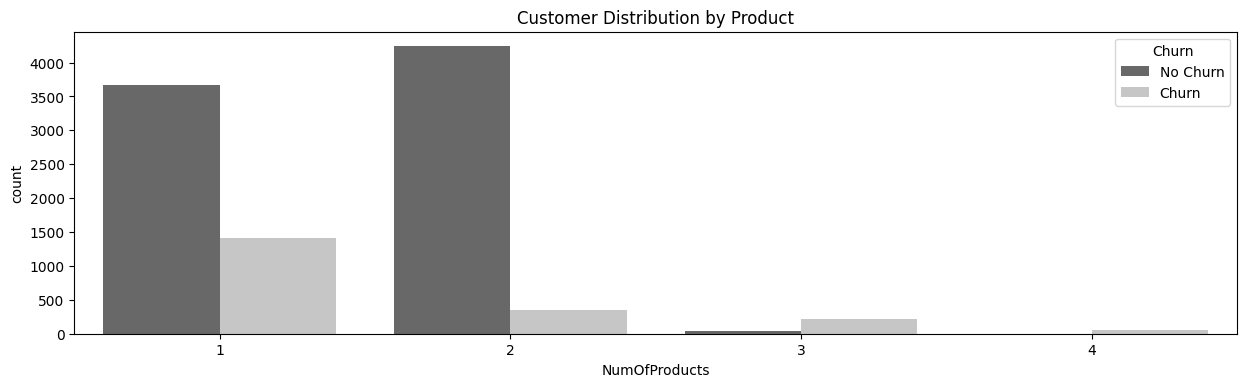

In [29]:
# Plot NumOfProducts versus Churn:
plt.figure(figsize=(15,4))
p=sns.countplot(x='NumOfProducts', hue='Churn', data=data, \
 palette="Greys_r")
legend = p.get_legend()
legend_txt = legend.texts
legend_txt[0].set_text("No Churn")
legend_txt[1].set_text("Churn")
p.set_title('Customer Distribution by Product')

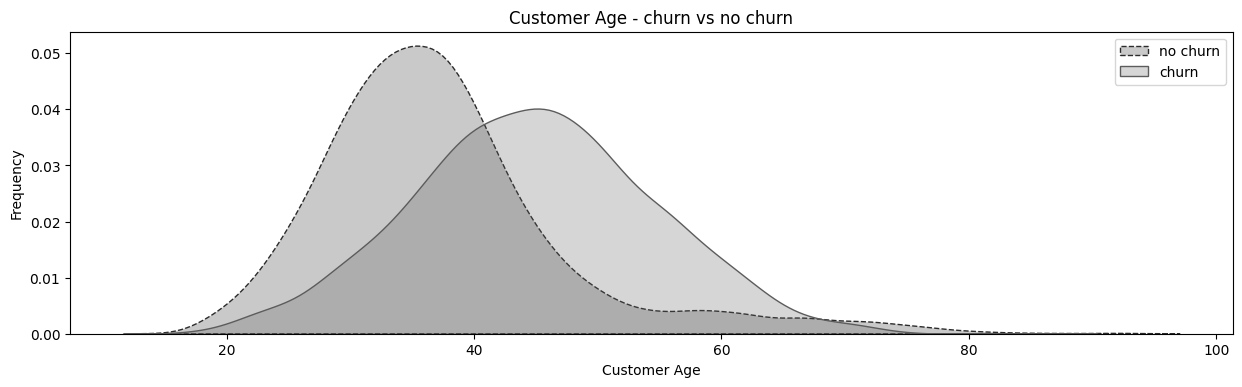

In [30]:
plt.figure(figsize=(15,4))
ax=sns.kdeplot(data.loc[(data['Churn'] == 0),'Age'] , \
 color=sns.color_palette("Greys_r")[0],\
 shade=True,label='no churn', \
 linestyle='--')
ax=sns.kdeplot(data.loc[(data['Churn'] == 1),'Age'] , \
 color=sns.color_palette("Greys_r")[1],\
 shade=True, label='churn')
ax.set(xlabel='Customer Age', ylabel='Frequency')
plt.title('Customer Age - churn vs no churn')
plt.legend()


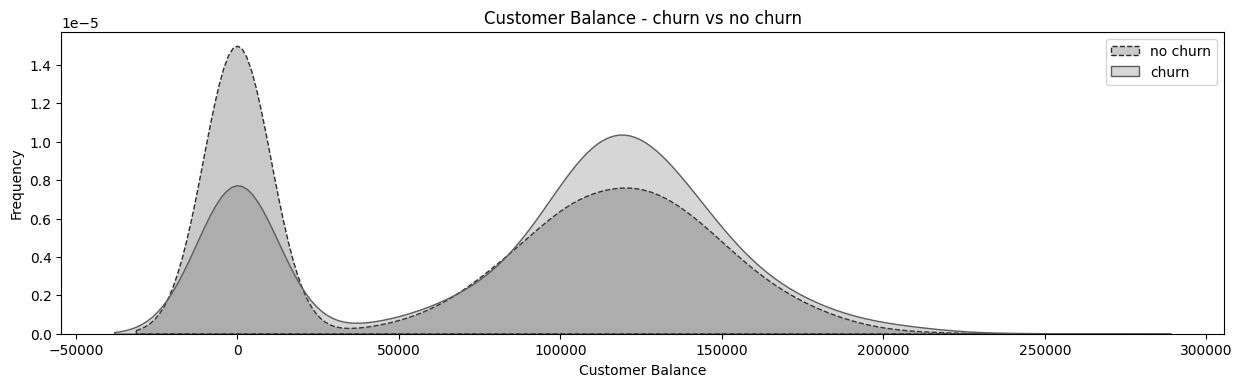

In [31]:
# Plot Balance versus Churn:
plt.figure(figsize=(15,4))
ax=sns.kdeplot(data.loc[(data['Churn'] == 0),'Balance'] , \
 color=sns.color_palette("Greys_r")[0],\
 shade=True,label='no churn',linestyle='--')
ax=sns.kdeplot(data.loc[(data['Churn'] == 1),'Balance'] , \
 color=sns.color_palette("Greys_r")[1],\
 shade=True, label='churn')
ax.set(xlabel='Customer Balance', ylabel='Frequency')
plt.title('Customer Balance - churn vs no churn')
plt.legend()

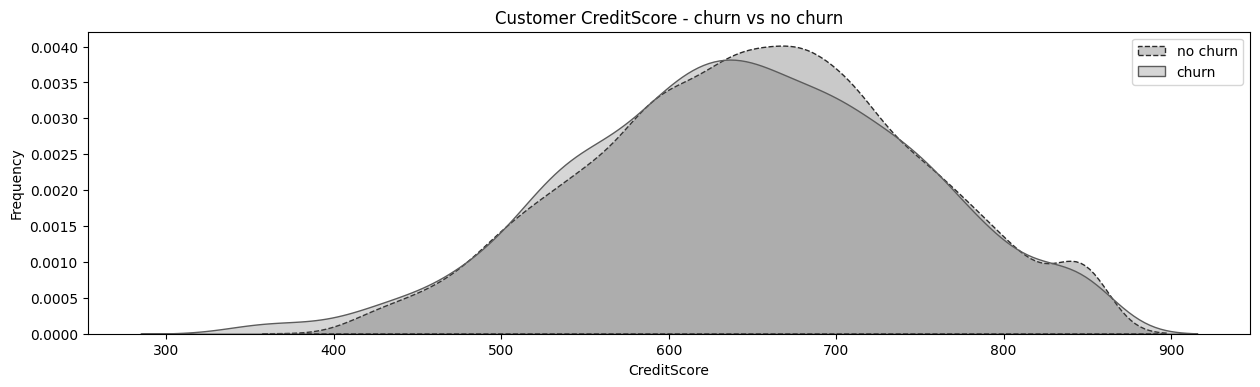

In [32]:
# Plot CreditScore versus Churn:
plt.figure(figsize=(15,4))
ax=sns.kdeplot(data.loc[(data['Churn'] == 0),'CreditScore'] , \
 color=sns.color_palette("Greys_r")[0],\
 shade=True,label='no churn',linestyle='--')
ax=sns.kdeplot(data.loc[(data['Churn'] == 1),'CreditScore'] , \
 color=sns.color_palette("Greys_r")[1],\
 shade=True, label='churn')
ax.set(xlabel='CreditScore', ylabel='Frequency')
plt.title('Customer CreditScore - churn vs no churn')
plt.legend()

Text(0.5, 1.0, 'Number of Product VS Balance')

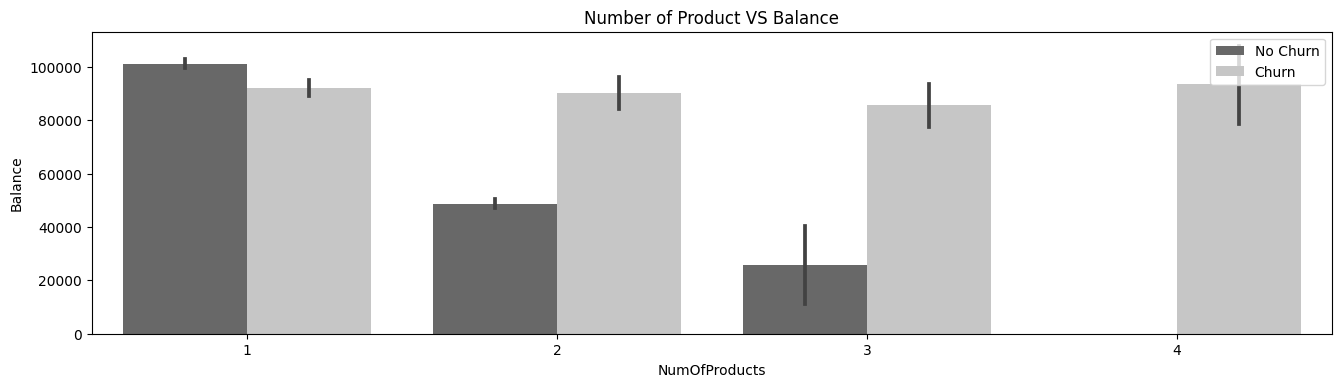

In [33]:
# So far you have been analyzing two variables at a time. Compare three variables
# by plotting Balance versus NumOfProducts by Churn:
plt.figure(figsize=(16,4))
p=sns.barplot(x='NumOfProducts',y='Balance',hue='Churn',\
 data=data, palette="Greys_r")
p.legend(loc='upper right')
legend = p.get_legend()
legend_txt = legend.texts
legend_txt[0].set_text("No Churn")
legend_txt[1].set_text("Churn")
p.set_title('Number of Product VS Balance')